<a href="https://colab.research.google.com/github/Alina2004A/BMD/blob/main/Levchenko_5_prakt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>5 практична</h1>
<p><font size=10>Левченко БС-11</font></p>

In [ ]:
## Виконання

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [ ]:
data = pd.read_csv("best-selling-mobile-phones.csv", encoding="utf-8")
data.head()

,manufacturer,model,form,smartphone,year,units_sold_m
0,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1
1,Apple,iPhone 5S,Touchscreen,Yes,2013,164.5
2,Nokia,3210,Bar,No,1999,161.0
3,Apple,iPhone 7 and iPhone 7 Plus,Touchscreen,Yes,2016,159.9
4,Nokia,6600,Bar,Yes,2003,150.0


In [ ]:
data1 = pd.DataFrame({"form": data["form"], "manufacturer": data["manufacturer"]})
data1.head()

,form,manufacturer
0,Touchscreen,Apple
1,Touchscreen,Apple
2,Bar,Nokia
3,Touchscreen,Apple
4,Bar,Nokia


In [ ]:
my_data = pd.DataFrame({
    "Touchscreen": [0 for i in range(3)],
    "Bar": [0 for i in range(3)],
}, index = ["Apple", "Nokia", "Samsung"])
for i in range (len(data)):
    if data["form"][i] == "Touchscreen":
        my_data["Touchscreen"][data["manufacturer"][i]] += 1
    else:
        my_data["Bar"][data["manufacturer"][i]] += 1
my_data

,Touchscreen,Bar
Apple,7,3
Nokia,2,16
Samsung,22,5


2. Побудувати графік, що відображає розподіл ознак в групах.

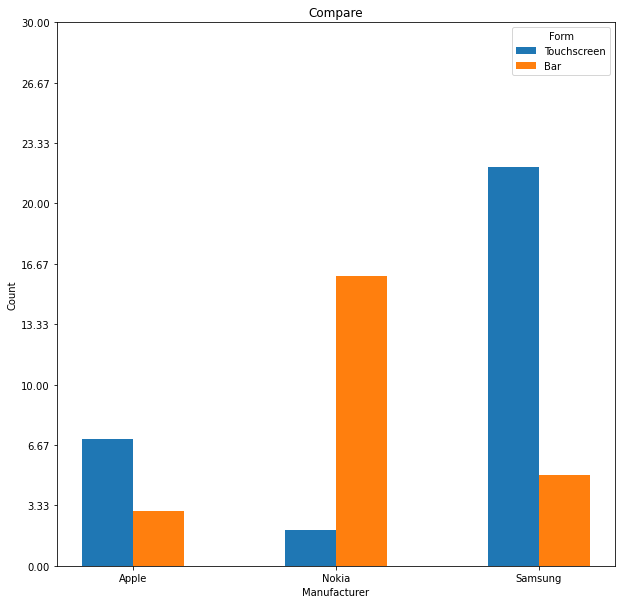

In [ ]:
width = 0.25
x = np.arange(len(my_data))
y = [i for i in np.linspace(0,30,10)]
fig, ax = plt.subplots(figsize = (10,10))
labels = ["Apple", "Nokia", "Samsung"]
rects1 = ax.bar(x - width/2, my_data["Touchscreen"], width, label='Touchscreen')
rects2 = ax.bar(x + width/2, my_data["Bar"], width, label='Bar')
ax.set_title('Compare')
ax.set_ylabel('Count')
ax.set_xlabel('Manufacturer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.legend(title = "Form")

3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [ ]:
def Pirson(data, significant_level):
    
    my_data1 = pd.DataFrame(my_data)
    x, y = my_data1.iloc[:,0], my_data1.iloc[:,1]
    n = len(my_data)
    
    if np.sum(x) != np.sum(y):
        my_data1["ni'"] = [(i/np.sum(y)*np.sum(x)) for i in y]
    my_data1["ni - ni'"] = [(my_data1.iloc[i,0] - my_data1.iloc[i,2]) for i in range(n)]
    my_data1["(ni - ni')^2/(ni')"] = [my_data1.iloc[i,3]**2/my_data1.iloc[i,2] for i in range(n)]
    x2_emp = round(np.sum(my_data1.iloc[:,4]),3)
    print("Кінцева таблиця спряженості:\n")
    print(my_data1)
    
    print("\nВідповідь:")
    print("X^2_emp = " + str(x2_emp))
    print("Ступені свободи = " + str(n-1))
    table = pd.read_excel("Таблиця критичних значень для критерію Пірсона.xlsx")
    x2_critical = table.iloc[n - 1, 1 if(significant_level == 0.001) else 2]
    print("X^2 _critical = " + str(x2_critical))
    
    if x2_emp > x2_critical:
        print("Розбіжності між розподіленнями статистично значимі на даному рівні значимості(",x2_emp,">",x2_critical,")")
    else:
        print("Розбіжності між розподіленнями немає на даному рівні значимості(",x2_emp,"<",x2_critical,")")

4. Перевірити розбіжність на між групами на даних з п. 1.

 * Початкова таблиця спряженості.

In [ ]:
my_data

,Touchscreen,Bar
Apple,7,3
Nokia,2,16
Samsung,22,5


* Оцінка розбіжності на рівні значення significant_level = 0,001

In [ ]:
Pirson(data1, 0.001)

Кінцева таблиця спряженості:

         Touchscreen  Bar        ni'   ni - ni'  (ni - ni')^2/(ni')
Apple              7    3   3.875000   3.125000            2.520161
Nokia              2   16  20.666667 -18.666667           16.860215
Samsung           22    5   6.458333  15.541667           37.400269

Відповідь:
X^2_emp = 56.781
Ступені свободи = 2
X^2 _critical = 9.2
Розбіжності між розподіленнями статистично значимі на даному рівні значимості( 56.781 > 9.2 )


* Оцінка розбіжності на рівні значення significant_level = 0,05

In [ ]:
Pirson(data1, 0.05)

Кінцева таблиця спряженості:

         Touchscreen  Bar        ni'   ni - ni'  (ni - ni')^2/(ni')
Apple              7    3   3.875000   3.125000            2.520161
Nokia              2   16  20.666667 -18.666667           16.860215
Samsung           22    5   6.458333  15.541667           37.400269

Відповідь:
X^2_emp = 56.781
Ступені свободи = 2
X^2 _critical = 6
Розбіжності між розподіленнями статистично значимі на даному рівні значимості( 56.781 > 6 )


* Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп. Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).

In [ ]:
new_data = pd.DataFrame({
    "Touchscreen": [0 for i in range(3)],
    "Bar": [0 for i in range(3)],
    "Touchscreen_percent": [0 for i in range(3)],
    "Bar_percent": [0 for i in range(3)],
}, index = ["Apple", "Nokia", "Samsung"])

for i in range (len(data)):
    if data["form"][i] == "Touchscreen":
        new_data["Touchscreen"][data["manufacturer"][i]] += 1
    else:
        new_data["Bar"][data["manufacturer"][i]] += 1
        
for i in range(0, len(new_data)):
    new_data.iloc[i,2] = str(round(new_data["Touchscreen"][i]/np.sum(new_data["Touchscreen"])*100,1)) + "%"
    new_data.iloc[i,3] = str(round(new_data["Bar"][i]/np.sum(new_data["Bar"])*100,1)) + "%"
    
new_data

,Touchscreen,Bar,Touchscreen_percent,Bar_percent
Apple,7,3,22.6%,12.5%
Nokia,2,16,6.5%,66.7%
Samsung,22,5,71.0%,20.8%
